In [3]:
from ler.rates import LeR

yr = 31536000
ler=LeR(
    npool=6,
    verbose=False,
    ifos=['CE', 'ET'],
    pdet_kwargs=dict(
        snr_th=10.0,
        snr_th_net=10.0,
        pdet_type="boolean",
        distribution_type="noncentral_chi2",
        include_optimal_snr=True,
        include_observed_snr=False,
    ),
    spin_zero = False,
    waveform_approximant = "IMRPhenomD",
    minimum_frequency = 10.0,)


Initializing LeR class...



In [4]:
lensed_param = ler.lensed_cbc_statistics(size=10, batch_size=10, resume=False)
rate_lensed, lensed_param_detectable = ler.lensed_rate()

print(f"\n=== Lensed Detection Rate Summary ===")
print(f"Detectable event rate: {rate_lensed:.2e} events per year")

lensed params will be stored in ./ler_data/lensed_param.json
removing ./ler_data/lensed_param.json if it exists
Batch no. 1
sampling lensed params...
sampling lens parameters with sample_all_routine_epl_shear_sl...
solving lens equations...


100%|███████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 62.68it/s]


calculating pdet...
lensed parameters already sampled.
saving all lensed parameters in ./ler_data/lensed_param.json 
Getting lensed_param from json file ./ler_data/lensed_param.json...
total lensed rate (yr^-1): 45.313257963398215
number of simulated lensed detectable events: 4
number of simulated all lensed events: 10
storing detectable params in ./ler_data/lensed_param_detectable.json

=== Lensed Detection Rate Summary ===
Detectable event rate: 4.53e+01 events per year


In [5]:
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'effective_phase', 'pdet_CE', 'optimal_snr_CE', 'pdet_ET1', 'optimal_snr_ET1', 'pdet_ET2', 'optimal_snr_ET2', 'pdet_ET3', 'optimal_snr_ET3', 'pdet_net', 'optimal_snr_net'])

In [6]:
lensed_param['optimal_snr_net'], lensed_param['pdet_net']

(array([[ 31.92697799,   7.5966101 ,          nan,          nan],
        [ 17.4828612 ,   6.97010281,          nan,          nan],
        [ 35.5359774 ,   6.99842613,          nan,          nan],
        [ 40.86771215,   6.00471977,          nan,          nan],
        [ 78.1891495 ,  26.16969145,          nan,          nan],
        [104.13069082,  17.29169089,          nan,          nan],
        [ 58.13344802,  26.89342332,          nan,          nan],
        [ 46.04286483,  13.15459005,          nan,          nan],
        [ 39.01432513,   8.86109735,          nan,          nan],
        [ 35.23033154,   4.81008003,          nan,          nan]]),
 array([[ 1.,  0., nan, nan],
        [ 1.,  0., nan, nan],
        [ 1.,  0., nan, nan],
        [ 1.,  0., nan, nan],
        [ 1.,  1., nan, nan],
        [ 1.,  1., nan, nan],
        [ 1.,  1., nan, nan],
        [ 1.,  1., nan, nan],
        [ 1.,  0., nan, nan],
        [ 1.,  0., nan, nan]]))

In [2]:
unlensed_param = ler.unlensed_cbc_statistics(size=100000, resume=False)
rate_unlensed, unlensed_param_detectable = ler.unlensed_rate()

unlensed params will be stored in ./ler_data/unlensed_param.json
removing ./ler_data/unlensed_param.json if it exists
Batch no. 1
sampling gw source params...
calculating pdet...
Batch no. 2
sampling gw source params...
calculating pdet...
saving all unlensed parameters in ./ler_data/unlensed_param.json 
Getting unlensed_param from json file ./ler_data/unlensed_param.json...
total unlensed rate (yr^-1): 88681.51317616575
number of simulated unlensed detectable events: 96831
number of simulated all unlensed events: 100000
storing detectable params in ./ler_data/unlensed_param_detectable.json


In [3]:
unlensed_param_detectable.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_CE', 'optimal_snr_CE', 'pdet_ET1', 'optimal_snr_ET1', 'pdet_ET2', 'optimal_snr_ET2', 'pdet_ET3', 'optimal_snr_ET3', 'pdet_net', 'optimal_snr_net'])

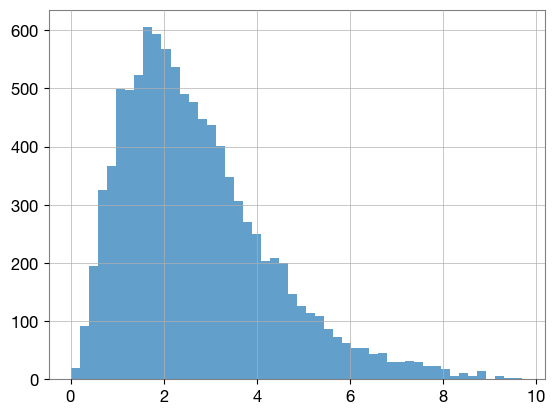

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lensed_param = ler.sample_all_routine_epl_shear_intrinsic(10000)

plt.hist(lensed_param['zl'], bins=50, alpha=0.7, label='Effective Luminosity Distance')
plt.show()

In [4]:
rates = ler.rate_comparison_with_rate_calculation()

Getting unlensed_param from json file ./ler_data/unlensed_param.json...
total unlensed rate (yr^-1): 456.35886250930764
number of simulated unlensed detectable events: 555
number of simulated all unlensed events: 100000
storing detectable params in ./ler_data/unlensed_param_detectable.json
Getting lensed_param from json file ./ler_data/lensed_param.json...
total lensed rate (yr^-1): 0.2734961879316053
number of simulated lensed detectable events: 273
number of simulated all lensed events: 100000
storing detectable params in ./ler_data/lensed_param_detectable.json
unlensed_rate: 456.35886250930764
lensed_rate: 0.2734961879316053
ratio: 1668.6114200006027


In [8]:
rates[2]['magnifications']

array([[  3.30724761,  15.41881695, -12.947884  ,  -3.1641633 ],
       [  2.28195312,   3.47495727,  -2.24547299,  -0.86106485],
       [  3.49283514,  25.85140929, -24.98282226,  -1.66587485],
       ...,
       [  5.21645891,   7.65252608,  -8.86717209,  -0.90358742],
       [  4.03740455,  26.35473801, -14.28232827, -13.85953856],
       [  5.24709972,  -3.03618852,   0.        ,   0.        ]])

In [6]:
from gwsnr import GWSNR
gwsnr = GWSNR(
    npool=6,
    pdet_kwargs=dict(
        snr_th=10.0,
        snr_th_net=10.0,
        pdet_type="boolean",
        distribution_type="noncentral_chi2",
        include_optimal_snr=True,
        include_observed_snr=False,
    ),
)


Initializing GWSNR class...

psds not given. Choosing bilby's default psds
Interpolator will be loaded for L1 detector from ./interpolator_json/L1/partialSNR_dict_1.json
Interpolator will be loaded for H1 detector from ./interpolator_json/H1/partialSNR_dict_1.json
Interpolator will be loaded for V1 detector from ./interpolator_json/V1/partialSNR_dict_1.json

Chosen GWSNR initialization parameters:

npool:  6
snr type:  interpolation_aligned_spins
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
reference frequency (f_ref):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['L1', 'H1', 'V1']
psds:  [[array([  10.21659,   10.23975,   10.26296, ..., 4972.81   ,
       4984.081  , 4995.378  ], shape=(2736,)), array([4.43925574e-41, 4.22777986e-41, 4.02102594e-41, ...,
       6.51153524e-46, 6.43165104e-46, 6.55252996e-46],
      shape=(2736,)), <scipy.interpolate._interpolate.interp1d object at 0x17

In [8]:
gwsnr.pdet()

{'pdet_L1': array([1]),
 'optimal_snr_L1': array([126.70322597]),
 'pdet_H1': array([1]),
 'optimal_snr_H1': array([80.58238087]),
 'pdet_V1': array([1]),
 'optimal_snr_V1': array([37.52248711]),
 'pdet_net': array([1]),
 'optimal_snr_net': array([154.77456062])}

In [7]:
from ler import LeR

ler = LeR(npool=6, verbose=False)


Initializing LeR class...



In [8]:
sfr_with_time_delay = ler.sfr_with_time_delay(zs=None, get_attribute=True)

Numerically solving the merger_rate_density with time delay
Computing merger rate density distribution (with time delay to SFR) using multiprocessing...


100%|█████████████████████████████████████████████████████████████| 500/500 [37:45<00:00,  4.53s/it]


sfr_with_time_delay interpolator will be generated at ./interpolator_json/merger_rate_density/sfr_with_time_delay_4.json


In [ ]:
madau_dickinson_sfr = ler.madau_dickinson_sfr(zs=None, get_attribute=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_delay_distribution(tau):
    # Time delay range from 0 to 20 Gyr
    td = np.linspace(0, 20, 1000)
    
    # Exponential distribution formula
    # P(td) = (1/tau) * exp(-td / tau)
    p_td = (1/tau) * np.exp(-td / tau)
    
    plt.figure(figsize=(9, 5))
    plt.plot(td, p_td, lw=3, color='#2c3e50', label=f'Exponential Delay ($\\tau={tau}$ Gyr)')
    
    # Fill area for visual effect
    plt.fill_between(td, p_td, color='#3498db', alpha=0.2)
    
    # Vertical line for the mean (tau)
    plt.axvline(tau, color='#e74c3c', linestyle='--', label=f'Mean delay ($\tau$)')
    
    plt.title('Probability Distribution of Delay Times $P(t_d | \\tau)$', fontsize=14)
    plt.xlabel('Delay Time $t_d$ [Gyr]', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.xlim(0, 20)
    plt.ylim(0, 1.1) # Kept stable for easier comparison
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

# Create interactive slider
interact(
    plot_delay_distribution, 
    tau=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Tau [Gyr]:')
);

interactive(children=(FloatSlider(value=1.0, description='Tau [Gyr]:', max=10.0, min=0.1), Output()), _dom_cla…